# Continuous Control

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np
#from cc_agent import Agent
from ddpg_agent import Agent
import numpy as np
import matplotlib.pyplot as plt
from collections import deque
import torch

In [7]:
try:
    env.close()
except:
    pass

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

For instance, if you are using a Mac, then you downloaded `Reacher.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Reacher.app")
```

In [2]:
env = UnityEnvironment(file_name='./Reacher_Windows_x86_64/Reacher.exe', no_graphics=False)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, a double-jointed arm can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every entry in the action vector must be a number between `-1` and `1`.

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
scores = np.zeros(len(env_info.agents))
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

agent = Agent(state_size=state_size, action_size=action_size, random_seed=0,num_agents=num_agents)


Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726624e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


### 3. Train the Agent with DDPG

Agent trains using Actor Critic method.  

c:\Users\succi\anaconda3\envs\drlnd\lib\site-packages\torch\nn\functional.py:995: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Episode 5	Reward: 0.83	Average Reward: 0.76
Episode 10	Reward: 3.10	Average Reward: 1.28
Episode 15	Reward: 9.02	Average Reward: 2.63
Episode 20	Reward: 27.72	Average Reward: 7.12
Episode 25	Reward: 37.06	Average Reward: 12.88
Episode 30	Reward: 38.06	Average Reward: 17.09
Episode 35	Reward: 37.63	Average Reward: 20.09
Episode 40	Reward: 36.36	Average Reward: 22.22
Episode 45	Reward: 36.86	Average Reward: 23.78
Episode 50	Reward: 37.29	Average Reward: 25.11
Episode 55	Reward: 37.16	Average Reward: 26.21
Episode 60	Reward: 38.02	Average Reward: 27.16
Episode 65	Reward: 36.70	Average Reward: 27.89
Episode 70	Reward: 37.77	Average Reward: 28.60
Episode 75	Reward: 37.09	Average Reward: 29.16
Episode 80	Reward: 37.10	Average Reward: 29.66
Episode 85	Reward: 37.24	Average Reward: 30.12
Episode 90	Reward: 36.31	Average Reward: 30.51
Episode 95	Reward: 38.14	Average Reward: 30.88
Episode 100	Reward: 35.35	Average Reward: 31.15
Episode 105	Reward: 36.73	Average Reward: 32.95
Episode 110	Reward:

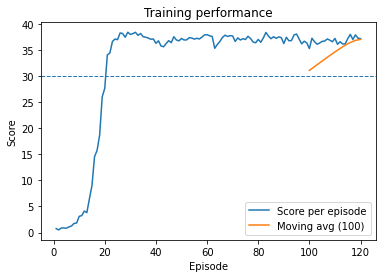

In [5]:
def ddpg(n_episodes=1000, print_every=100):
    scores_deque = deque(maxlen=print_every)
    scores = []
    agent_scores = []
    for i_episode in (range(1, n_episodes+1)):
        env_info = env.reset(train_mode=True)[brain_name]
        state = env_info.vector_observations
        agent.reset()
        score = 0.
        individual_scores = np.zeros(num_agents)
        while True:
            action = agent.act(state)
            env_info = env.step(action)[brain_name]
            next_state = env_info.vector_observations
            reward = env_info.rewards
            done = env_info.local_done
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += np.mean(reward)
            individual_scores += reward
            if np.any(done):
                break 
        scores_deque.append(score)
        scores.append(score)
        agent_scores.append(individual_scores)
        print('\rEpisode {}\tReward: {:.2f}\tAverage Reward: {:.2f}'.format(i_episode, score, np.mean(scores_deque)), end="")
        
        if i_episode % 5 == 0:
            print('\rEpisode {}\tReward: {:.2f}\tAverage Reward: {:.2f}'.format(i_episode, score, np.mean(scores_deque)))
        
        if sum(np.array(scores_deque)>=30)>=100:
            print('\n\nEnvironment Solved in {:d} episodes!\tAverage Reward: {:.2f}'.format(i_episode-100,
                                                                                          np.mean(scores_deque)))
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor2.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic2.pth')
            break
            
    return scores, agent_scores

def plot_scores(scores, window=100, solved_score=30.0, savepath=None):
    """
    Plot per-episode scores and a moving average.
    Args:
        scores (list[float]): one score per episode
        window (int): moving-average window (Udacity uses 100)
        solved_score (float): horizontal reference line (30 for Reacher)
        savepath (str|None): if set, saves the figure to this path
    """
    scores = np.asarray(scores, dtype=float)
    episodes = np.arange(1, len(scores) + 1)

    # moving average (uses cumulative average if fewer than window points)
    if len(scores) >= window:
        ma = np.convolve(scores, np.ones(window)/window, mode='valid')
        ma_x = np.arange(window, len(scores) + 1)
    else:
        ma = np.cumsum(scores) / episodes
        ma_x = episodes

    fig, ax = plt.subplots()
    ax.plot(episodes, scores, label="Score per episode")
    ax.plot(ma_x, ma, label=(f"Moving avg ({window})" if len(scores) >= window else "Cumulative avg"))
    ax.set_xlabel("Episode")
    ax.set_ylabel("Score")
    ax.set_title("Training performance")
    ax.legend(loc="best")
    if solved_score is not None:
        ax.axhline(solved_score, linestyle="--", linewidth=1)
    if savepath:
        fig.savefig(savepath, dpi=150, bbox_inches="tight")
    plt.show()

scores, agent_scores = ddpg()

plot_scores(scores, window=100, solved_score=30.0, savepath="reacher_scores.png")


When finished, you can close the environment.

### 4. Run the trained agent in reacher environment


In [5]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
agent.actor_local.load_state_dict(torch.load('checkpoint_actor2.pth', map_location=device))
agent.actor_local.eval()

env_info = env.reset(train_mode=False)[brain_name]
state    = env_info.vector_observations        # (state_size,)
score    = 0.0

for t in range(1000):
    action   = agent.act(state, add_noise=False)    # (action_size,)
    env_info = env.step(action.reshape(1, -1))[brain_name]
    next_state = env_info.vector_observations

    done       = env_info.local_done

    state = next_state
    if np.any(done):
        break

print(f"Episode score: {score:.2f}")
env.close()

c:\Users\succi\anaconda3\envs\drlnd\lib\site-packages\torch\nn\functional.py:995: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Episode score: 0.00
